## Fit a single-site model to an experiment and blank titration simultaneously
Fits binding of calcium onto EDTA. 

In [1]:
%matplotlib inline
import pytc

# Fit successful? True
# 2017-05-16 09:01:51.061940
# Units: cal/mol
# Fit type: maximum likelihood
# AIC: -269.7977598055613
# AICc: -268.5803685012135
# BIC: -254.16673868963278
# F: 639862.8061614158
# Rsq: 0.9999706195649027
# Rsq_adjusted: 0.9999690567758018
# df: 95
# ln(L): 140.89887990278066
# num_obs: 100
# num_param: 5
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
global,global_heat,NA,-4.81352e+02,2.02562e+02,-8.83544e+02,-7.91609e+01,False,0.00000e+00,-inf,inf
global,global_intercept,NA,-3.01159e-01,2.57817e-02,-3.52350e-01,-2.49969e-01,False,0.00000e+00,-inf,inf
local,K,ca-edta/tris-01.DH,3.93750e+07,3.66018e+05,3.86483e+07,4.01018e+07,False,1.00000e+06,-inf,inf
local,dH,ca-edta/tris-01.DH,-1.16161e+04,4.66258e+00,-1.16253e+04,-1.16068e+04,False,-4.00000e+03,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,9.74053e-01,8.78811e-05,9.73878e-01,9.74227e-01,False,1.00000e+00,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


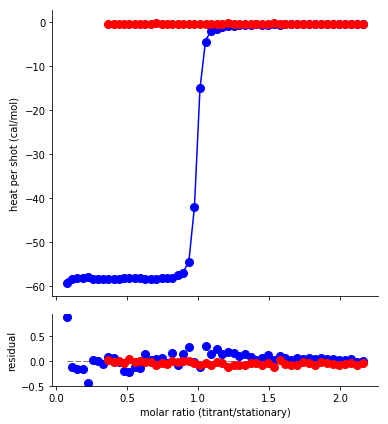

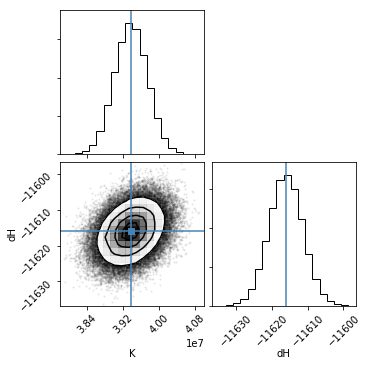

In [2]:
# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat and
# intercept to global parameters
g.add_experiment(a)
g.link_to_global(a,"dilution_heat","global_heat")
g.link_to_global(a,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Load in a blank titration
b = pytc.ITCExperiment("ca-edta/tris-blank.DH",pytc.indiv_models.Blank,shot_start=10)

# Add a blank titration to the fitter. Then link the dilution heat and
# intercept to global parameters
g.add_experiment(b)
g.link_to_global(b,"dilution_heat","global_heat")
g.link_to_global(b,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Do a global fit to the single-site and blank titrations
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)
c = g.corner_plot()
